In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Exercise 9.1

In [2]:
# Load data
data = pd.read_csv('/Users/camilla/Desktop/seeds_dataset.txt', delimiter = "\t", names = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AssymetryCoefficient', 'KernelGrooveLength', 'Class'], dtype = float)

In [3]:
# Check that everything looks as expected
data.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AssymetryCoefficient,KernelGrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [4]:
# Make a list of column names, remove class
columns = list(data.columns)
columns.remove('Class')

In [5]:
# Calculate SSE for elbowplot
SSE = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    SSE.append(km.inertia_)

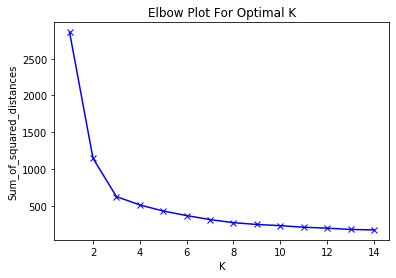

In [6]:
# Show elbow plot
plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Plot For Optimal K');

In [7]:
# Create PCA reduced data set for visualization
reduced_data = PCA().fit_transform(data[columns])
reduced_data = pd.DataFrame(reduced_data)
reduced_data['Class'] = list(data['Class'])

## K-means Clustering

In [8]:
# Create K means with three clusters and elkan version
kmeans = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1, algorithm='elkan')
kmeans.fit(data[columns])
labels = kmeans.labels_
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))
print('SSE: ' + str(kmeans.inertia_))
print('Iterations: ' + str(kmeans.n_iter_))
reduced_data['Class_elkan'] = kmeans.labels_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

silhouette score: 0.47193373191268845
SSE: 587.3186115940427
Iterations: 6


In [9]:
# Create K means with three clusters and full version
kmeans = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1, algorithm='full')
kmeans.fit(data[columns])
labels = kmeans.labels_
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))
print('SSE: ' + str(kmeans.inertia_))
print('Iterations: ' + str(kmeans.n_iter_))
reduced_data['Class_full'] = kmeans.labels_

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

silhouette score: 0.47193373191268845
SSE: 587.3186115940427
Iterations: 6


In [10]:
# Scale data to reduce intra-variable variance
scaled_data = StandardScaler().fit_transform(data[columns])

# Create K means with three clusters and elkan version
kmeans = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1, algorithm='elkan')
kmeans.fit(scaled_data)
labels = kmeans.labels_
print('silhouette score: ' + str(silhouette_score(scaled_data, labels)))
print('SSE: ' + str(kmeans.inertia_))
print('Iterations: ' + str(kmeans.n_iter_))
reduced_data['Class_scaled'] = kmeans.labels_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

silhouette score: 0.4007270552751299
SSE: 430.65897315130053
Iterations: 9


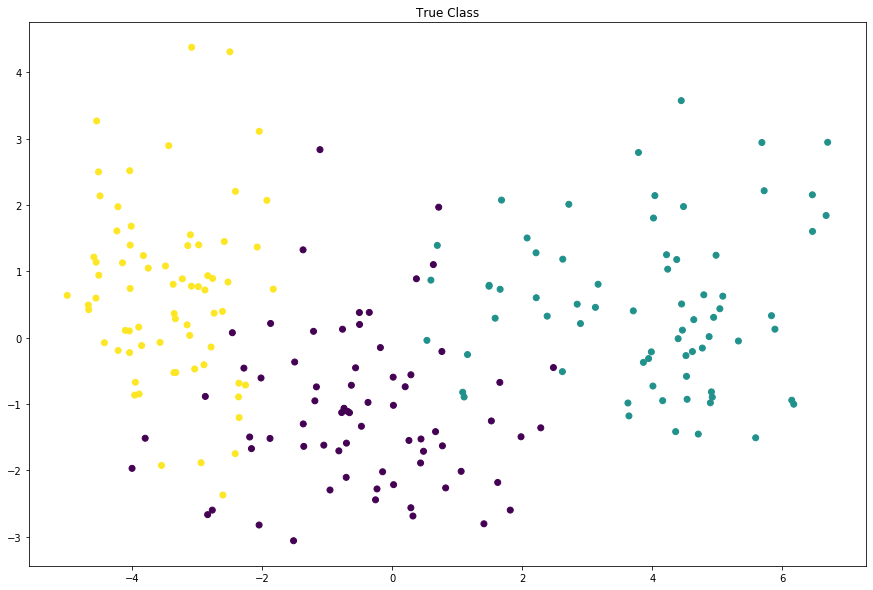

In [11]:
# Plot of true class
fig = plt.figure(figsize=(15,10))
plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data['Class'])
plt.title('True Class'); 

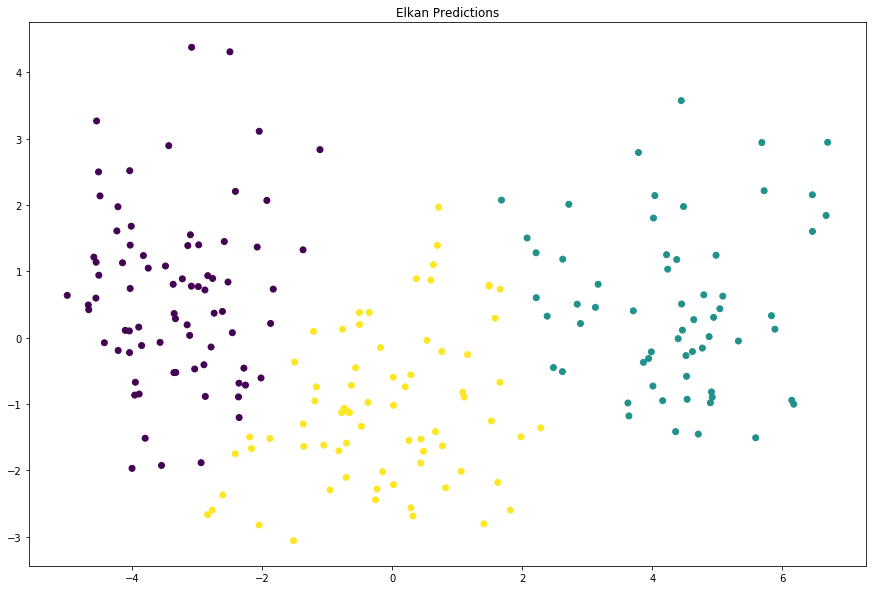

In [12]:
# Plot of elkan predictions
fig = plt.figure(figsize=(15,10))
plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data['Class_elkan'])
plt.title('Elkan Predictions'); 

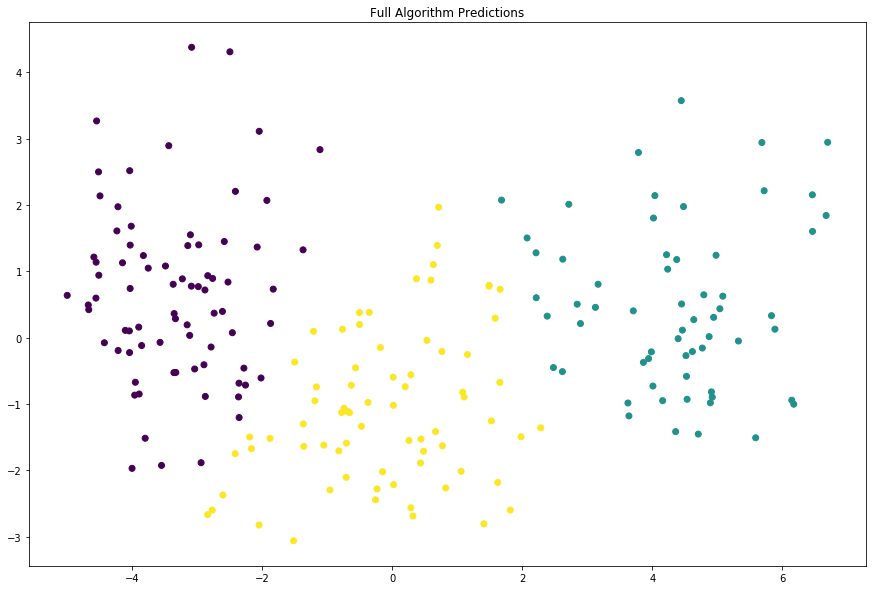

In [13]:
# Plot of full version predictions
fig = plt.figure(figsize=(15,10))
plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data['Class_full'])
plt.title('Full Algorithm Predictions'); 

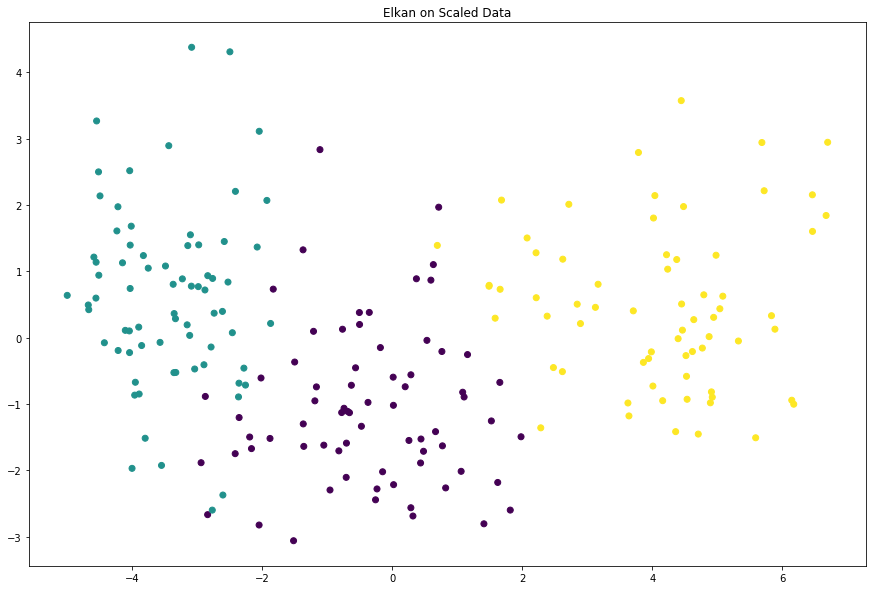

In [14]:
# plot of scaled + elkan predictions
fig = plt.figure(figsize=(15,10))
plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data['Class_scaled'])
plt.title('Elkan on Scaled Data'); 

## EM-Clustering

In [15]:
# imports
from sklearn.mixture import GaussianMixture

In [16]:
# Elbow calculations of BIC
BIC = []
K = range(1,15)
for k in K:
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(data[columns])
    BIC.append(gm.bic(data[columns]))

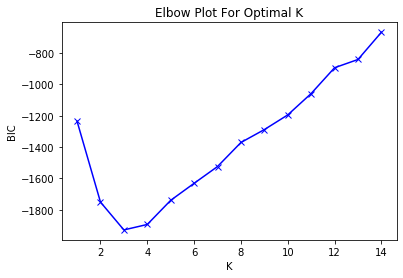

In [17]:
# Elbow plot of BIC
plt.plot(K, BIC, 'bx-')
plt.xlabel('K')
plt.ylabel('BIC')
plt.title('Elbow Plot For Optimal K');

In [18]:
# create EM clustering with 3 clusters
gm = GaussianMixture(n_components=3)
gm.fit(data[columns])
labels = gm.predict(data[columns])
print('bayesian information score: ' + str(gm.bic(data[columns])))
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))
reduced_data['Class_GM'] = labels

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

bayesian information score: -1901.0465918350433
silhouette score: 0.4505982185449035


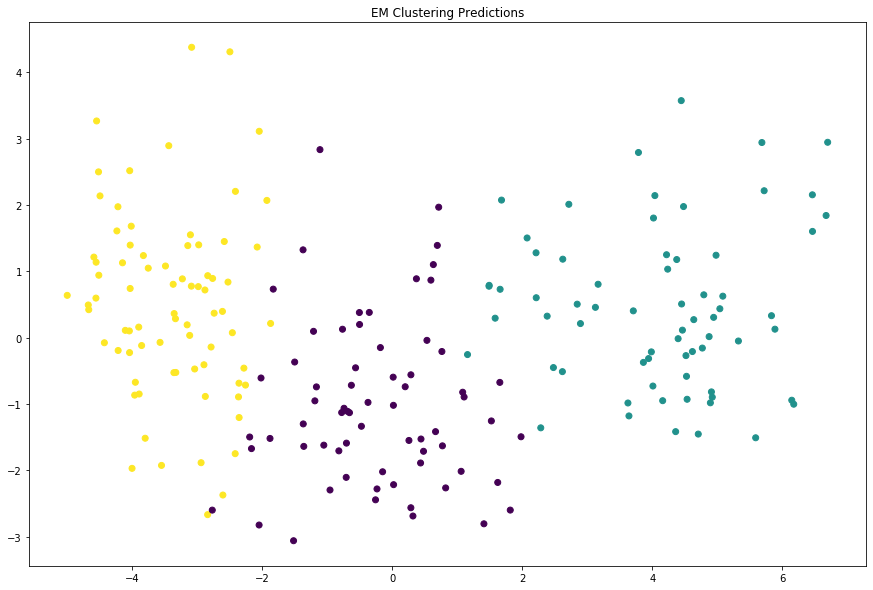

In [19]:
# plot em predictions
fig = plt.figure(figsize=(15,10))
plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data['Class_GM'])
plt.title('EM Clustering Predictions');

### Comparison of different parameter settings and quality measures

In [20]:
gm = GaussianMixture(n_components=6, random_state=0)
gm.fit(data[columns])
labels = gm.predict(data[columns])
reduced_data['Class_GM'] = labels
print('bayesian information score: ' + str(gm.bic(data[columns])))
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

bayesian information score: -1658.0567169396522
silhouette score: 0.2590619691908596


In [21]:
kmeans = KMeans(n_clusters = 6, random_state = 0, n_jobs = -1, algorithm='full')
kmeans.fit(data[columns])
labels = kmeans.labels_
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))
print('SSE: ' + str(kmeans.inertia_))
print('Iterations: ' + str(kmeans.n_iter_))
reduced_data['Class_full'] = kmeans.labels_

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

silhouette score: 0.3686657809373922
SSE: 323.27027205797935
Iterations: 6


In [22]:
gm = GaussianMixture(n_components=10, random_state=0)
gm.fit(data[columns])
labels = gm.predict(data[columns])
reduced_data['Class_GM'] = labels
print('bayesian information score: ' + str(gm.bic(data[columns])))
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

bayesian information score: -1153.9746796385787
silhouette score: 0.22693776988141326


In [23]:
kmeans = KMeans(n_clusters = 10, random_state = 0, n_jobs = -1, algorithm='full')
kmeans.fit(data[columns])
labels = kmeans.labels_
print('silhouette score: ' + str(silhouette_score(data[columns], labels)))
print('SSE: ' + str(kmeans.inertia_))
print('Iterations: ' + str(kmeans.n_iter_))
reduced_data['Class_full'] = kmeans.labels_

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

silhouette score: 0.34034187781513847
SSE: 199.6626779735707
Iterations: 9


## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

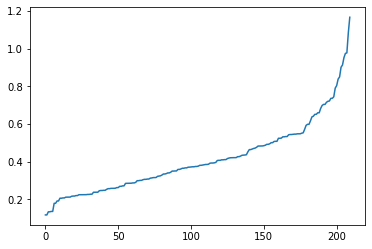

In [25]:
# Nearest neigbours knee plot - to estimate optimal epsilon
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(data[columns])
distances, indices = nbrs.kneighbors(data[columns])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances); 

In [26]:
# Values for eps and minpts to check
eps=[0.8, 0.9, 1.0]
min_samples = [6, 7]

In [27]:
# Nested for loop to check quality of clustering solutions 
label_list = []
for e in eps:
    for s in min_samples:
        db = DBSCAN(eps=e, min_samples=s).fit(data[columns])
        reduced_data['eps: ' + str(e) + ', min_samples: ' + str(s)] = db.labels_
        label_list.append('eps: ' + str(e) + ', min_samples: ' + str(s))
        print('eps: ' + str(e))
        print('minpts: ' + str(s))
        bool_arr = (db.labels_ == db.labels_[0])
        if not np.all(bool_arr): 
            print('Silhouettescore: ' + str(silhouette_score(data[columns], db.labels_)))
        else: print('All labels are the same')
        print('Estimated clusters: ', set(db.labels_))

eps: 0.8
minpts: 6
Silhouettescore: 0.22668485931435314
Estimated clusters:  {0, 1, 2, -1}
eps: 0.8
minpts: 7
Silhouettescore: 0.2106197748331809
Estimated clusters:  {0, 1, 2, -1}
eps: 0.9
minpts: 6
Silhouettescore: 0.3387905414870941
Estimated clusters:  {0, 1, -1}
eps: 0.9
minpts: 7
Silhouettescore: 0.31999849995800417
Estimated clusters:  {0, 1, -1}
eps: 1.0
minpts: 6
Silhouettescore: 0.2590600003120291
Estimated clusters:  {0, -1}
eps: 1.0
minpts: 7
Silhouettescore: 0.3969136755955253
Estimated clusters:  {0, 1, -1}


Text(0.5, 1.0, 'Predictions with params eps: 0.8, min_samples: 6')

Text(0.5, 1.0, 'Predictions with params eps: 0.8, min_samples: 7')

Text(0.5, 1.0, 'Predictions with params eps: 0.9, min_samples: 6')

Text(0.5, 1.0, 'Predictions with params eps: 0.9, min_samples: 7')

Text(0.5, 1.0, 'Predictions with params eps: 1.0, min_samples: 6')

Text(0.5, 1.0, 'Predictions with params eps: 1.0, min_samples: 7')

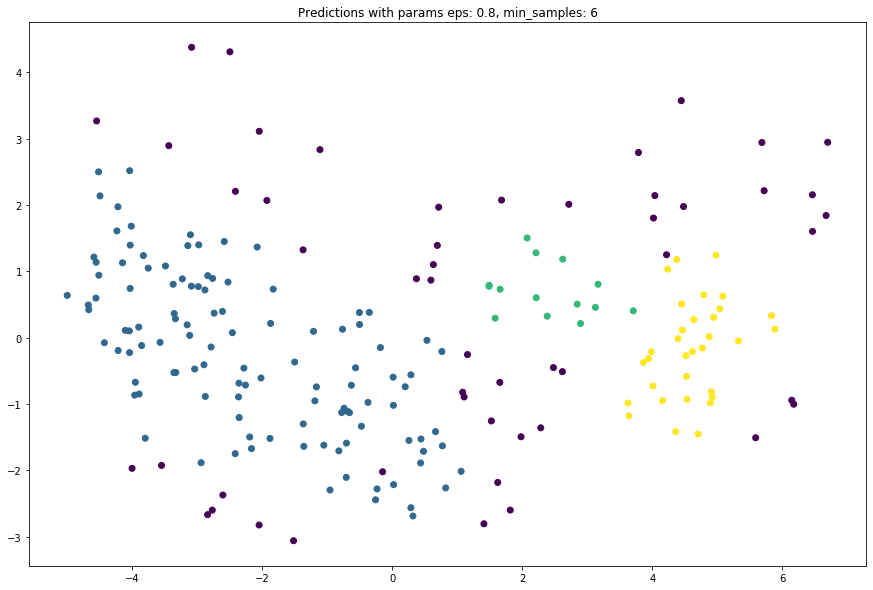

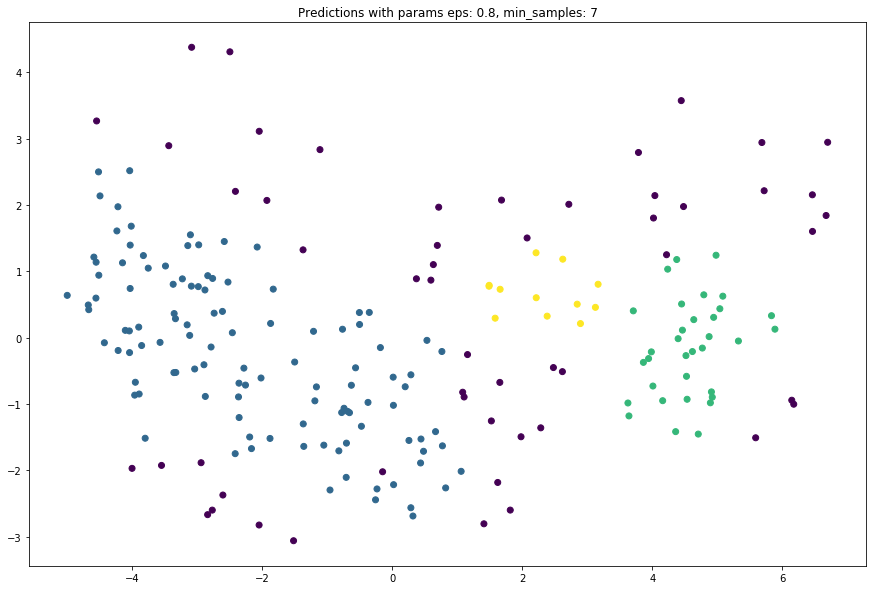

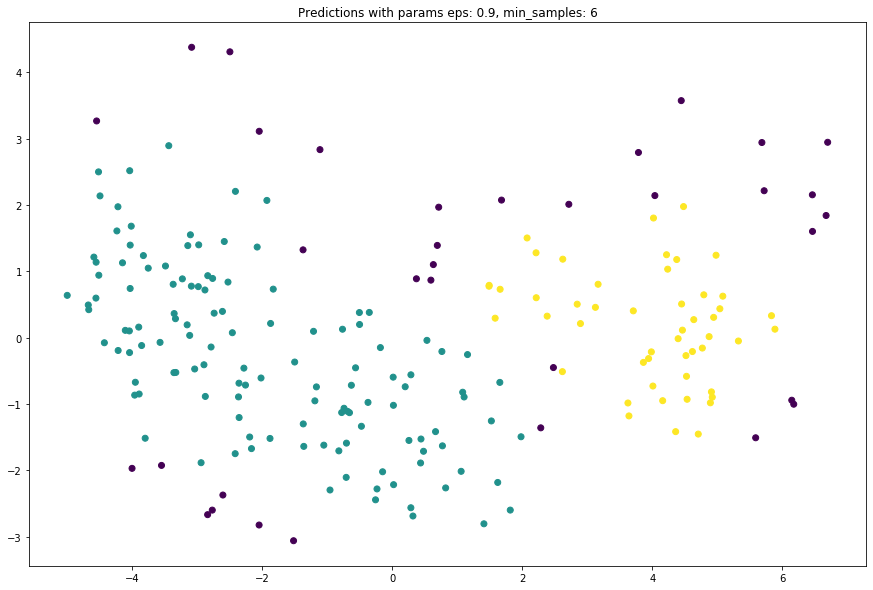

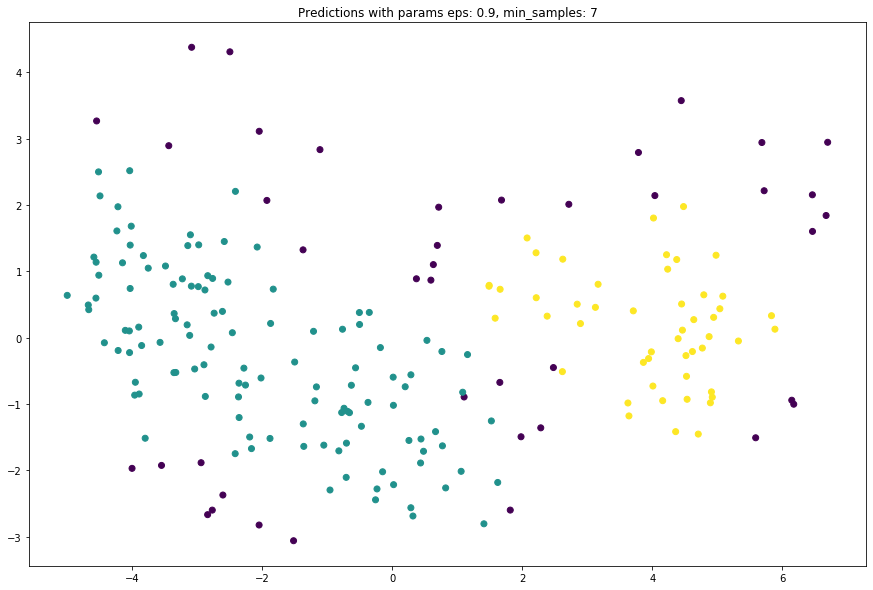

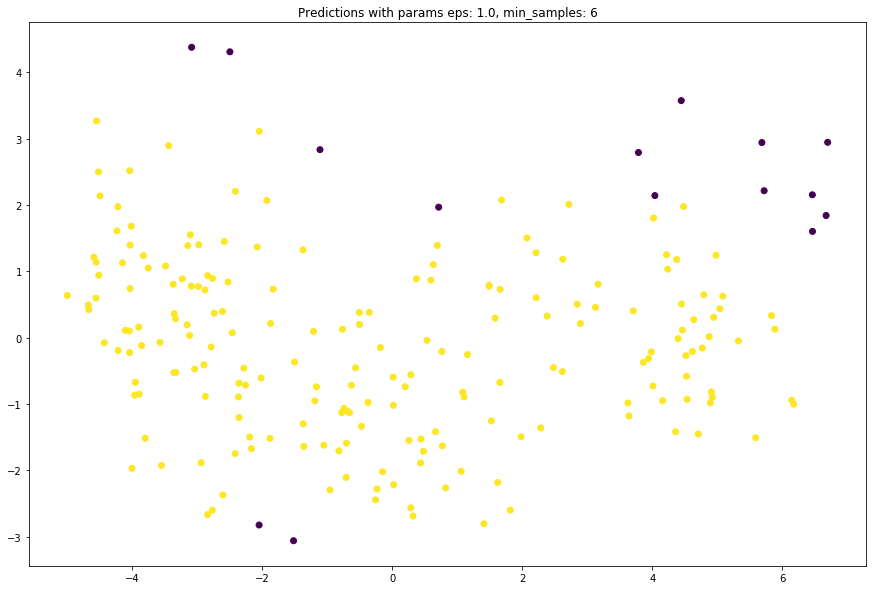

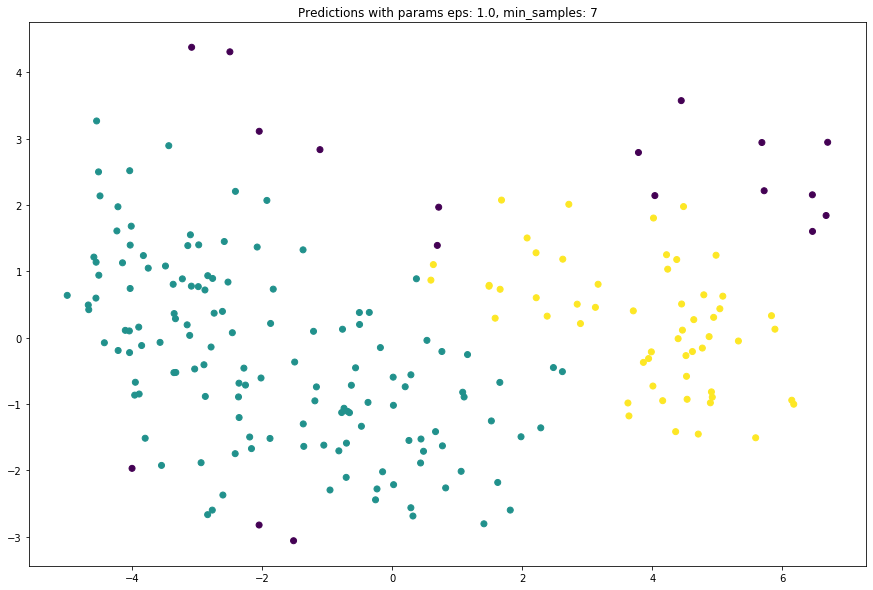

In [28]:
# Make scatter plots to visually present clustering solutions
for label in label_list:
    fig = plt.figure(figsize=(15,10))
    plt.scatter(x = reduced_data[0], y = reduced_data[1], c = reduced_data[label])
    plt.title('Predictions with params ' + label); 